<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/M2Det_A_Single_Shot_Object_Detector_based_on_Multi_Level_Feature_Pyramid_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M2Det: A Single-Shot Object Detector based on Multi-Level Feature Pyramid Network**

논문 링크: https://arxiv.org/abs/1811.04533

본 논문은 M2Det 논문이다. 해당 논문에서는 FPN을 개선한 MLFPN을 제안한다.

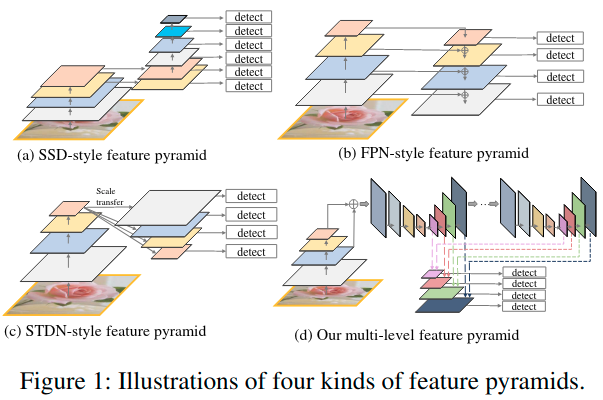

먼저, 등장 배경은 FPN을 개선한 부분에서 알 수 있듯이 FPN의 한계점 때문에 나오게 되었다. FPN의 한계점은 아래와 같다.
1. **FPN은 object detection을 수행할만큼의 충분한 표현력을 가지고 있지 않다.** 기본적으로 FPN은 backbone에서 생성한 feature map을 이용하는데, 이 backbone이 애초에 classification을 목적으로 구현이 되어있기 때문에 detection task에서 사용하기에는 부족한 면이 있다.
2. **FPN은 backbone에서 deep layer의 feature map만 사용한다.** 일반적으로 convolution network에서 깊은 레이어(deep layer)는 high-level feature을, 낮은 레이어(shallow layer)는 low-level feature를 담고 있다고 알려져있다. detection의 성능을 높이기 위해선 두 가지 모두 사용해야 좋지만, FPN은 deep layer만 사용하고 있다.

## **M2Det**

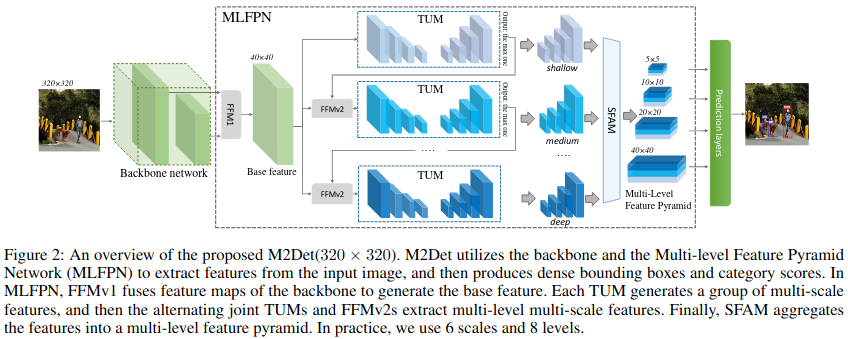

위의 그림은 M2Det의 전반적인 구조를 보여준다. 우리가 살펴봐야할 것은 당연히 MLFPN이고, 이것은 **FFM, TUM, SFAM** 세 가지 module로 구성되어 있다.

### **FFMs**

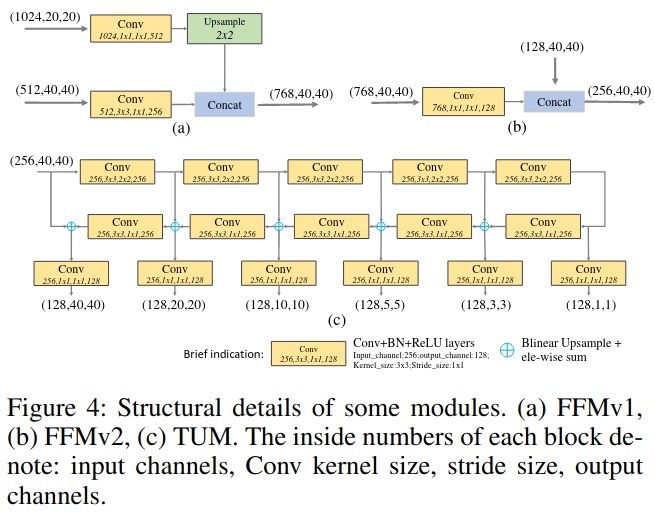

위의 그림 Figure 4에서 (a)와 (b) 부분이 각각 FFMv1과 FFMv2이다.

FFMs는 FFMv1과 FFMv2를 의미한다. **기본적으로 FFMs는 다양한 level에서 feature들을 융합하기 위해 사용**된다. 추가적으로 연산량을 줄이기 위해 **1 x 1 convolution layer**로 channel을 감소시키고, feature map을 통합하기 위해 **concatenation 연산**을 수행한다.

FFMv1은 backbone에서 서로 다른 size의 두 feature map을 input으로 받기 때문에 upsampling 연산을 통해 scale을 맞춰주고 concatenation 연산을 수행한다.

FFMv2는 이전 TUM의 가장 큰 output feature map과 base feature를 input으로 받는다. 두 feature map의 크기는 동일하기 때문에 그냥 concatenation 연산을 수행하고 다음 TUM으로 전달한다.

### **TUMs**

TUMs는 위의 그림 Figure 2를 보면 알 수 있듯이 M2Det에서 총 3개가 사용된다. 그리고 위의 그림 Figure 4의 (c) 부분과 같이 얇은 U자 형태의 구조를 가지고 있다.

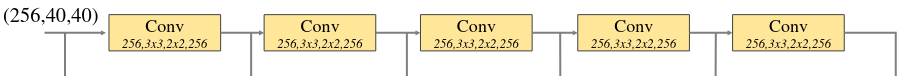

해당 부분이 encoder인데, encoder는 stride가 2인 3 x 3 convolution layer를 연속으로 쌓았다.

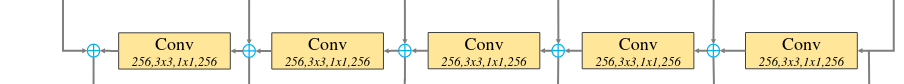

decoder는 위와 같이 upsampling과 element-wise sum을 거친 후 1 x 1 convolution을 진행한다. 각 TUM에서 decoder의 모든 출력 값은 SFAM에 융합되어 multi-scale feature를 형성한다.

맨 처음 TUM, 중간 TUM, 마지막 TUM은 각각 low-level feature, midium-level feature, high-level feature를 제공한다.

**이렇게 설명할 때는 3개의 TUMs를 사용했지만, 실제로는 8개의 TUMs를 사용한다. 또한, 각 TUM은 5개의 down-sampling convolution + 5개의 up-sampling convolution으로 이루어져있다. 따라서 총 6 scale에서 object를 구할 수 있다.** 따라서 최종적으로 MLFPN은 6개의 output에 두 개의 convolution을 적용해 location regression과 classification을 각각 수행한다. anchor box는 3개의 aspect ratio를 지닌 6개의 anchor box를 사용한다.

### **SFAM**

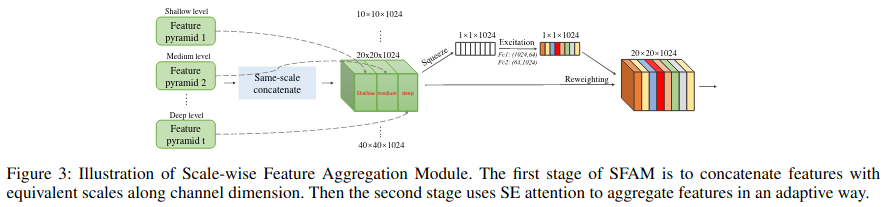

SFAM은 TUMs에서 생성한 multi-level feature를 multi-level feature pyramid로 통합하는 역할이다.

방금 TUMs에서 살펴본 것과 같이 여러 sacle의 feature map이 생성이 되는데, 이 **세 개의 TUM이 생성한 multi-sacle feature map 중 동일한 size를 가진 feature map을 모아서 concatenation 연산**을 수행한다. 이렇게 concat이 된 feature map에 SENet에서 제안한 SE block을 적용해 최종적인 multi-scale feature map이 생성된다.

## **Experiments**

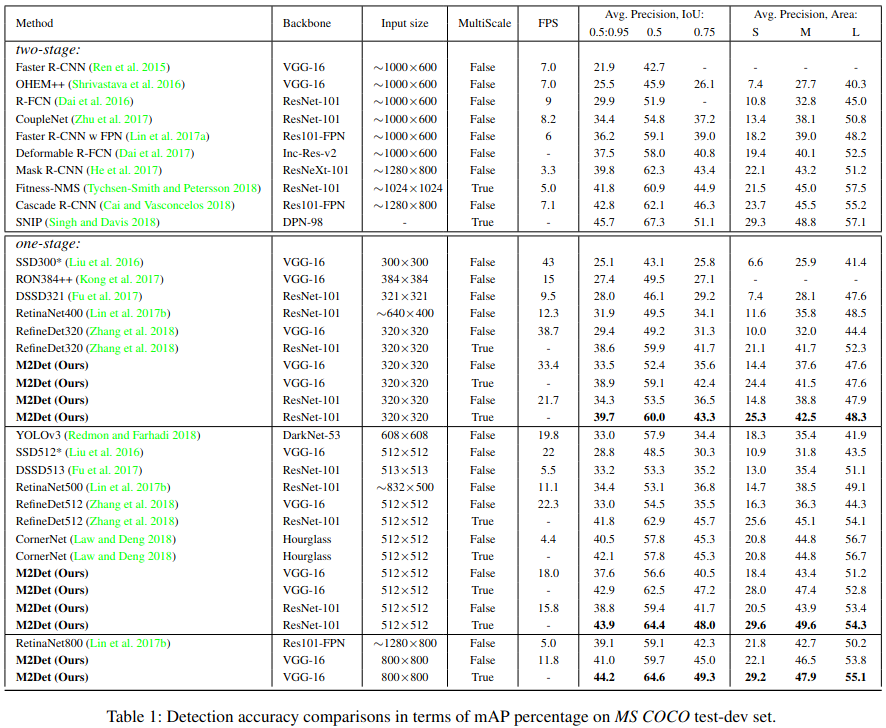